# Visualise and Analyse Final Dataset

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

import statsmodels.formula.api as smf

The lastest year with most data available is **2014**. Whenever a year is to be chosen, analysis will be conducted for  this year. Will use a range if it is necessary to generalise, acquire more results, this is another reason that a variable is used instead of hard coding.

In [3]:
magic_year = 2014

In [4]:
ds = pd.read_csv("project_data.csv")

ds.head()

,country_name,country_code,gdp_2004,gdp_2005,gdp_2006,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,...,economic_freedom_index_2011,economic_freedom_index_2012,economic_freedom_index_2013,economic_freedom_index_2014,democracy_score_2016,democracy_score_2011,democracy_score_2012,democracy_score_2013,democracy_score_2014,democracy_score_2015
0,Angola,AGO,1041.086844,1443.991929,2062.415149,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,...,5.13,5.32,5.21,5.08,3.40,3.32,3.35,3.35,3.35,3.35
1,Albania,ALB,2416.588235,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,...,7.25,7.21,7.27,7.40,5.91,5.81,5.67,5.67,5.67,5.91
2,United Arab Emirates,ARE,36161.170607,39439.801968,42372.221662,42672.613229,45758.905536,33072.575166,35049.148317,40462.312090,...,8.06,8.08,8.11,7.98,2.75,2.58,2.58,2.52,2.64,2.75
3,Argentina,ARG,4251.574348,5076.883829,5878.761027,7193.617640,8953.359275,8161.306966,10276.260498,12726.908359,...,5.67,5.15,5.01,4.81,6.96,6.84,6.84,6.84,6.84,7.02
4,Armenia,ARM,1191.961920,1643.758397,2158.002909,3138.808703,4010.026997,2993.832531,3218.381655,3526.978143,...,7.71,7.75,7.70,7.71,3.88,4.09,4.09,4.02,4.13,4.00


## Visualise and Describe Democracy, GDP, and a Financial Liberties values for a single year

### GDP

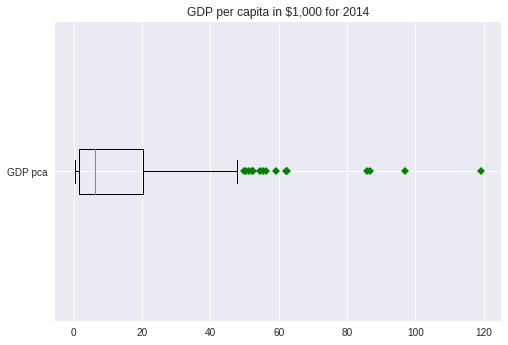

In [5]:
gdp_column = "gdp_%s" % magic_year

gdp_data = ds[gdp_column].dropna()

# gdp_data

plt.figure()
plt.boxplot([gdp_data / 1000], 0, 'gD', 0, labels=["GDP pca"])
plt.title("GDP per capita in $1,000 for %s" % magic_year)
plt.show()

In [6]:
gdp_data.describe()

count       134.000000
mean      16224.437678
std       22316.913842
min         312.748979
25%        1474.134603
50%        6234.432671
75%       20329.203029
max      119172.741757
Name: gdp_2014, dtype: float64

In [7]:
gdp_data.var()

498044643.4290505

In [8]:
kgdp = map(int, gdp_data / 1000)
# print(kgdp)
mode(kgdp)

ModeResult(mode=array([0]), count=array([20]))

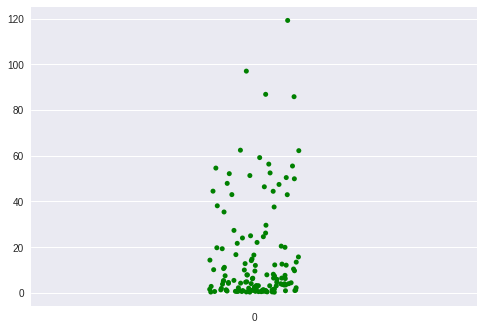

In [9]:
sns.stripplot(data=(gdp_data / 1000), jitter=True, color="g")

### Economic Freedom

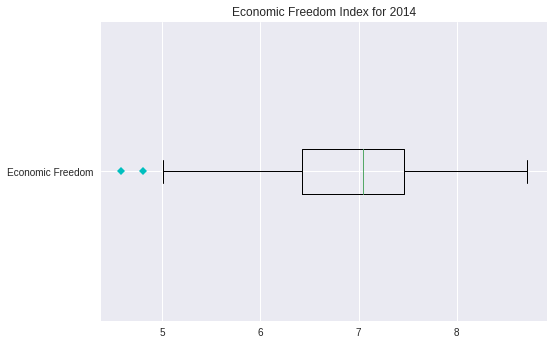

In [10]:
freedom_column = "economic_freedom_index_%s" % magic_year

economic_freedom = ds[freedom_column].dropna()

# econ_freedom_data

plt.figure()
plt.boxplot([economic_freedom], 0, 'cD', 0, labels=["Economic Freedom"])
plt.title("Economic Freedom Index for %s" % magic_year)
plt.show()

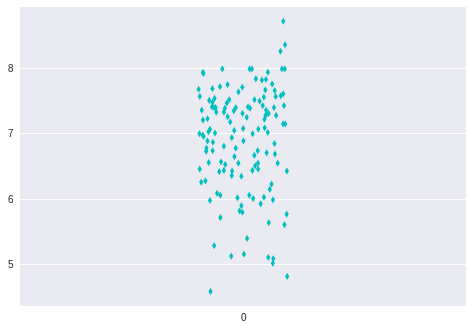

In [11]:
sns.stripplot(data=economic_freedom, jitter=True, color="c", marker="d")

In [12]:
economic_freedom.describe()

count    135.000000
mean       6.892667
std        0.805859
min        4.580000
25%        6.425000
50%        7.040000
75%        7.465000
max        8.710000
Name: economic_freedom_index_2014, dtype: float64

In [13]:
economic_freedom.var()

0.6494092537313432

In [14]:
economic_freedom_ints = map(int, economic_freedom)
# print(economic_freedom_ints)
mode(economic_freedom_ints)

ModeResult(mode=array([7]), count=array([68]))

## Civil Freedom

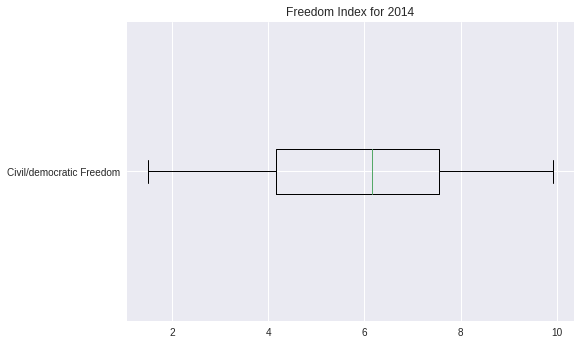

In [15]:
civil_freedom_column = "democracy_score_%s" % magic_year

civil_freedom = ds[civil_freedom_column].dropna()

# civil_freedom_data

plt.figure()
plt.boxplot([civil_freedom], 0, 'bD', 0, labels=["Civil/democratic Freedom"])
plt.title("Freedom Index for %s" % magic_year)
plt.show()

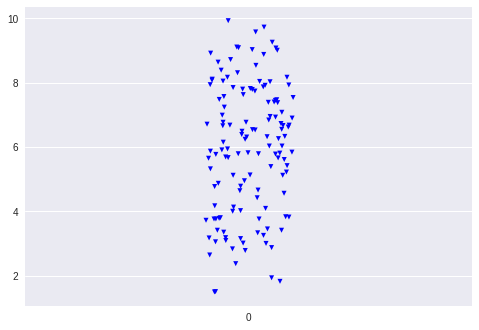

In [16]:
sns.stripplot(data=civil_freedom, jitter=True, color="b", marker="v")

In [17]:
civil_freedom.describe()

count    135.000000
mean       5.954963
std        2.024466
min        1.490000
25%        4.150000
50%        6.150000
75%        7.555000
max        9.930000
Name: democracy_score_2014, dtype: float64

In [18]:
civil_freedom.var()

4.09846249861802

In [19]:
civil_freedom_ints = map(int, civil_freedom)
# print(civil_freedom_ints)
mode(civil_freedom_ints)

ModeResult(mode=array([6]), count=array([27]))

## Visualise relationships

In [20]:
df_viz1 = ds[[gdp_column, freedom_column, civil_freedom_column]].rename(
    columns={gdp_column: "gdp", freedom_column: 'financial_freedom', civil_freedom_column: "civil_freedom"}).dropna()

# Per usual divide GDP w. 1000
df_viz1['gdp'] = df_viz1['gdp'] / 1000

df_viz1.head()

,gdp,financial_freedom,civil_freedom
0,4.709312,5.08,3.35
1,4.575764,7.40,5.67
2,44.449740,7.98,2.64
3,12.245256,4.81,6.84
4,3.994712,7.71,4.13


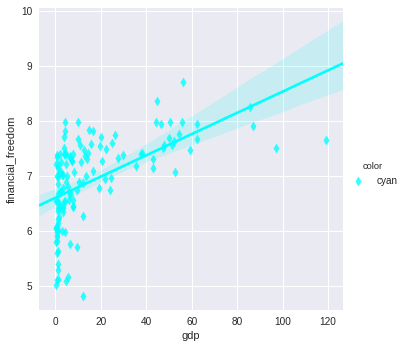

In [21]:
df_viz1['color'] = 'cyan'

sns.lmplot('gdp', 'financial_freedom', df_viz1, line_kws={'color': 'cyan'}, markers=["d"],
           hue="color", palette=dict(cyan="cyan"))

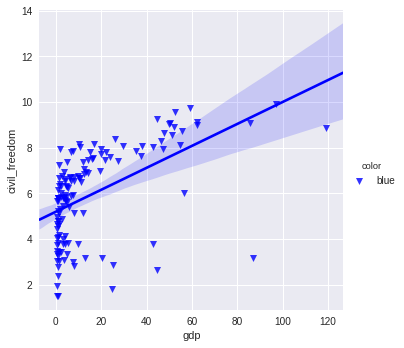

In [22]:
df_viz1['color'] = 'blue'

sns.lmplot('gdp', 'civil_freedom', df_viz1, line_kws={'color': 'blue'}, markers=["v"],
           hue="color", palette=dict(blue="blue"))

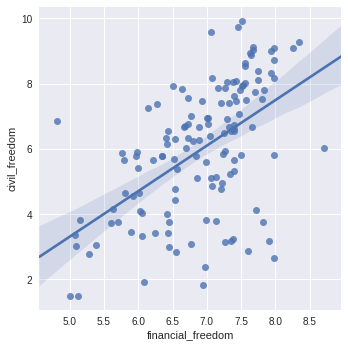

In [23]:
sns.lmplot('financial_freedom', 'civil_freedom', df_viz1)

### Correlation Heatmap

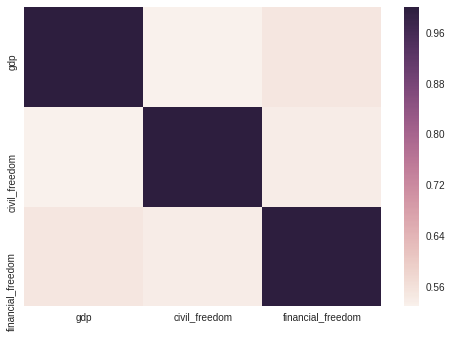

In [24]:
correlations = df_viz1[['gdp', 'civil_freedom', 'financial_freedom']].corr()
sns.heatmap(correlations)

## Relationships summaries

In [25]:
lm = smf.ols(formula='gdp ~ civil_freedom + financial_freedom', data=df_viz1).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     40.01
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           2.73e-14
Time:                        16:24:07   Log-Likelihood:                -573.81
No. Observations:                 134   AIC:                             1154.
Df Residuals:                     131   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -78.7916     14.033     -5.615      0.000    -106.552     -51.032
civil_freedom         3.6230      0.902      4.015      0.000       1.838       5.408
financial_freedom    10.6200      2.330      4.557      0.000       6.010      15.230
==============================================================================
Omnibus:                       62.856   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.067
Skew:                           1.779   Prob(JB):                     4.00e-46
Kurtosis:                       7.978   Cond. No.                         86.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assemble dataframe from different years

Decided to unify metrics from last X years to one dataframe so that there would be a plethora of datapoints.

In [31]:
years = range(2011, 2014 + 1) # +1 to indicate that the range includes last one

In [32]:
years

[2011, 2012, 2013, 2014]

In [43]:
aggregated_ds = pd.DataFrame()

for year in years:
    gdp_column = "gdp_%s" % year
    freedom_column = "economic_freedom_index_%s" % year
    civil_freedom_column = "democracy_score_%s" % year

    if len(aggregated_ds) == 0:
        # print("Initialise from current year, %s" % year)
        aggregated_ds = ds[[gdp_column, freedom_column,civil_freedom_column]].rename(
            columns={
                gdp_column: "gdp",
                freedom_column: "financial_freedom",
                civil_freedom_column: "civil_freedom"
            }
        )
    else:
        # print("Will merge %s with existing dataset" % year)
        append_ds = ds[[gdp_column, freedom_column,civil_freedom_column]].rename(
            columns={
                gdp_column: "gdp",
                freedom_column: "financial_freedom",
                civil_freedom_column: "civil_freedom"
            }
        )
        aggregated_ds = aggregated_ds.append(append_ds)

    # print(len(aggregated_ds))

aggregated_ds.dropna(inplace=True)

aggregated_ds

,gdp,financial_freedom,civil_freedom
0,4299.012889,5.13,3.32
1,4437.178068,7.25,5.81
2,40462.312090,8.06,2.58
3,12726.908359,5.67,6.84
4,3526.978143,7.71,4.09
5,62245.100292,7.93,9.22
6,51126.741392,7.57,8.49
7,7189.691229,6.19,3.15
8,260.479907,5.30,4.01
9,47702.774145,7.31,8.05


In [44]:
lm = smf.ols(formula='gdp ~ civil_freedom + financial_freedom',
             data=aggregated_ds).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gdp   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     153.0
Date:                Mon, 21 Aug 2017   Prob (F-statistic):           4.19e-53
Time:                        17:49:29   Log-Likelihood:                -5922.0
No. Observations:                 529   AIC:                         1.185e+04
Df Residuals:                     526   BIC:                         1.186e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.762e+04   7181.048    -10.809      0.000   -9.17e+04   -6.35e+04
civil_freedom      3544.9193    451.048      7.859      0.000    2658.842    4430.997
financial_freedom  1.056e+04   1197.603      8.817      0.000    8206.562    1.29e+04
==============================================================================
Omnibus:                      208.385   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.699
Skew:                           1.797   Prob(JB):                    4.08e-176
Kurtosis:                       7.871   Cond. No.                         88.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""